# Building a predictive model "what and how affects the price of a car" based on a sample data set

## 1. Loading data - reading the data set from the URL and adding the related headers.

In [12]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df = pd.read_csv(url, names = headers)
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


## 2. Dealing with missing data

<p>As we see in a head of "df" dataframe sample sata set has a missing or incorrect data like "?". </p>
<p>Correct format of missing data is "nan", which mainly means "not a number". </p>

In [21]:
df.replace("?", np.nan, inplace = True)
df.tail(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


As we see, I replaced "?" on NaN values in all of the "df" data set. 

In [15]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
False    201
Name: symboling, dtype: int64

normalized-losses
False    201
Name: normalized-losses, dtype: int64

make
False    201
Name: make, dtype: int64

fuel-type
False    201
Name: fuel-type, dtype: int64

aspiration
False    201
Name: aspiration, dtype: int64

num-of-doors
False    201
Name: num-of-doors, dtype: int64

body-style
False    201
Name: body-style, dtype: int64

drive-wheels
False    201
Name: drive-wheels, dtype: int64

engine-location
False    201
Name: engine-location, dtype: int64

wheel-base
False    201
Name: wheel-base, dtype: int64

length
False    201
Name: length, dtype: int64

width
False    201
Name: width, dtype: int64

height
False    201
Name: height, dtype: int64

curb-weight
False    201
Name: curb-weight, dtype: int64

engine-type
False    201
Name: engine-type, dtype: int64

num-of-cylinders
False    201
Name: num-of-cylinders, dtype: int64

engine-size
False    201
Name: engine-size, dtype: int64

fuel-system
False    201
Name: fuel-syst

<p>Now, I know how much each of columns has missing values. The fewer, the better of course. </p>
<p>I need a strategy what kind of data i need to put in my "df". If column has int or float type of data that could be avg value </p>
<p>If it's string, in pandas case "object" it could be good to put value which happend the most. </p>

In Pandas, we use 
<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>

In [20]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [23]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
avg_bore=df['bore'].astype('float').mean(axis=0)
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
avg_stroke = df["stroke"].astype("float").mean(axis=0)

df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
df["bore"].replace(np.nan, avg_bore, inplace=True)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)
df["stroke"].replace(np. nan, avg_stroke, inplace = True)


<p> I replaced all missing values which should be numbers with avarage value from whole column. </p>
<p> Now, I need to replaced missing values which should be a "strings", in this case objects (because of pandas use). </p>

In [27]:
df['num-of-doors'].value_counts()   #this code is going to output all unique values from num-of-doors column with sum all of them

four    114
two      89
Name: num-of-doors, dtype: int64

I can use other code which's going to output as result most common value in specified column. 

In [30]:
idmax_num_of_doors = df['num-of-doors'].value_counts().idxmax()

'four'

In [31]:
df["num-of-doors"].replace(np.nan, idmax_num_of_doors, inplace = True)

It is good to check what I've done and if it's done properly. 

In [35]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    205
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    205
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
False    205
Name: fuel-syst

<p>For condition "isnull" almost all columns have all of the results FALSE - it means that we have NOT missing values anymore.</p>
<p>In column 'price' I still have missing values, 4 exactly. PRICE is something I going to predict, so it's allright to just delete those missing values. </p>

In [39]:
df.dropna(subset=["price"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)


In [40]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

symboling
False    201
Name: symboling, dtype: int64

normalized-losses
False    201
Name: normalized-losses, dtype: int64

make
False    201
Name: make, dtype: int64

fuel-type
False    201
Name: fuel-type, dtype: int64

aspiration
False    201
Name: aspiration, dtype: int64

num-of-doors
False    201
Name: num-of-doors, dtype: int64

body-style
False    201
Name: body-style, dtype: int64

drive-wheels
False    201
Name: drive-wheels, dtype: int64

engine-location
False    201
Name: engine-location, dtype: int64

wheel-base
False    201
Name: wheel-base, dtype: int64

length
False    201
Name: length, dtype: int64

width
False    201
Name: width, dtype: int64

height
False    201
Name: height, dtype: int64

curb-weight
False    201
Name: curb-weight, dtype: int64

engine-type
False    201
Name: engine-type, dtype: int64

num-of-cylinders
False    201
Name: num-of-cylinders, dtype: int64

engine-size
False    201
Name: engine-size, dtype: int64

fuel-system
False    201
Name: fuel-syst

Now I have all clear and prepared data in my 'df'. Last thing to do is to set correct data types. 

In [51]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")
df['horsepower'] = df['horsepower'].astype('int', copy = True)
df['compression-ratio'] = df['compression-ratio'].astype('float', copy = True)

In [43]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg). mpg means miles per galon. God sake, we are in Europe!
df['city-L/100km'] = 235/df["city-mpg"]

In [47]:
df.head()  # just checking what I've done before a sec

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [52]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
dtype: object

## 3. Data normalization 

In [53]:
# replace (original value) by (original value)/(maximum value)
# I don't need to know exactly what value of length etc. has impact on price value. I need to know IF it does.
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

In [55]:
lwh = ['length', 'width', 'height']
df[lwh].head()  # just checking what I've done before a sec
# The closer the value was to 1, the given value was relatively higher.

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis. 

Text(0.5, 1.0, 'horsepower bins')

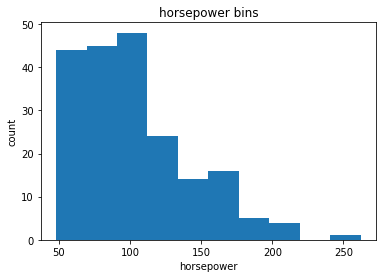

In [59]:
# example bins creating for horsepower paramefer from 'df'
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

#I see that there is possibility to divide all 'horsepower' values to 3 or 4 bins. 

In [60]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins
#bins is array which on the left side there's minimum value from whole column and on the right side there's maximum value for column. 
#It could be good to make 3 bins - from 48 to 119, from 119 to 190, and from 190 to 262.

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [71]:
bins_name_hp = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=bins_name_hp, include_lowest=True )
print(df[['horsepower','horsepower-binned']].head(10), "....")
print(" ")
print(df['horsepower-binned'].value_counts())

   horsepower horsepower-binned
0         111               Low
1         111               Low
2         154            Medium
3         102               Low
4         115               Low
5         110               Low
6         110               Low
7         110               Low
8         140            Medium
9         101               Low ....
 
Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64


Text(0.5, 1.0, 'horsepower bins')

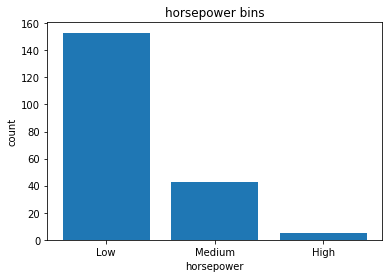

In [73]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(bins_name_hp, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

We see the column "fuel-type" has two unique values, "gas" or "diesel". 
Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" into indicator variables. 

In [76]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [80]:
df['gas'].value_counts()

1    181
0     20
Name: gas, dtype: int64

In [81]:
df.to_csv('clean_df.csv')  

Now I have clean and well prepared data set to make a predictive model. 

# 4. Model Development

I need to build a mathematical model (feature) based on a few parameters.

In [82]:
from sklearn.linear_model import LinearRegression

In [101]:
path = "Documents\Python\clean_df.csv"
df = pd.read_csv(r'C:\Users\Mistrz Łukasz\Documents\Python\clean_df.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,27,13495.0,11.190476,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,27,16500.0,11.190476,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,30,13950.0,9.791667,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,22,17450.0,13.055556,Low,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114,5400.0,23,28,16845.0,10.217391,Low,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160,5300.0,19,25,19045.0,12.368421,Medium,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106,4800.0,26,27,22470.0,9.038462,Low,1,0


I need to check which columns has impact on price. 

<p>Pearson Correlation</p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>

<b>P-value</b>: 
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

<p>By convention, when the</p>
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [95]:
from scipy import stats

In [99]:
pearson_coef1, p_value1 = stats.pearsonr(df['width'], df['price'])
pearson_coef2, p_value2 = stats.pearsonr(df['curb-weight'], df['price'])
pearson_coef3, p_value3 = stats.pearsonr(df['engine-size'], df['price'])
pearson_coef4, p_value4 = stats.pearsonr(df['bore'], df['price'])
pearson_coef5, p_value5 = stats.pearsonr(df['city-mpg'], df['price'])
pearson_coef6, p_value6 = stats.pearsonr(df['highway-mpg'], df['price'])
pearson_coef7, p_value7 = stats.pearsonr(df['wheel-base'], df['price'])
pearson_coef8, p_value8 = stats.pearsonr(df['horsepower'], df['price'])
pearson_coef9, p_value9 = stats.pearsonr(df['length'], df['price'])


print("width: The Pearson Correlation Coefficient is", pearson_coef1, " with a P-value of P =", p_value1)
print('  ')
print("curb-weight: The Pearson Correlation Coefficient is", pearson_coef2, " with a P-value of P =", p_value2)
print('  ')
print("engine-size: The Pearson Correlation Coefficient is", pearson_coef3, " with a P-value of P =", p_value3)
print('  ')
print("bore: The Pearson Correlation Coefficient is", pearson_coef4, " with a P-value of P =", p_value4)
print('  ')
print("city-mpg: The Pearson Correlation Coefficient is", pearson_coef5, " with a P-value of P =", p_value5)
print('  ')
print("highway-mpg: The Pearson Correlation Coefficient is", pearson_coef6, " with a P-value of P =", p_value6)
print('  ')
print("wheel-base: The Pearson Correlation Coefficient is", pearson_coef7, " with a P-value of P =", p_value7)
print('  ')
print("horsepower: The Pearson Correlation Coefficient is", pearson_coef8, " with a P-value of P =", p_value8)
print('  ')
print("length: The Pearson Correlation Coefficient is", pearson_coef9, " with a P-value of P =", p_value9)


width: The Pearson Correlation Coefficient is 0.7512653440522674  with a P-value of P = 9.200335510481516e-38
  
curb-weight: The Pearson Correlation Coefficient is 0.8344145257702846  with a P-value of P = 2.1895772388936914e-53
  
engine-size: The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64
  
bore: The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P = 8.049189483935489e-17
  
city-mpg: The Pearson Correlation Coefficient is -0.6865710067844677  with a P-value of P = 2.321132065567674e-29
  
highway-mpg: The Pearson Correlation Coefficient is -0.7046922650589529  with a P-value of P = 1.7495471144477352e-31
  
wheel-base: The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732989e-20
  
horsepower: The Pearson Correlation Coefficient is 0.8096068016571054  with a P-value of P = 6.273536270650504e-48
  
length: The Pearson Correlation Coefficient is 0.6906283804483

Since all categories are related to price due to p_value, I will choose those with the highest pcc values.

In [111]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y = df['price']
zz = ['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']

In [114]:
lm = LinearRegression()
lm.fit(Z, Y)
a = lm.intercept_
b = lm.coef_
Y_hat = lm.predict(Z)
a,b, Y_hat

(-15811.863767729232,
 array([53.53022809,  4.70805253, 81.51280006, 36.1593925 ]),
 array([13699.07700462, 13699.07700462, 19052.71346719, 10620.61524404,
        15520.90025344, 13869.27463809, 15455.88834114, 15973.77411958,
        17612.7829335 , 10722.47987021, 10722.47987021, 17804.67839001,
        18063.62127923, 19320.4783358 , 26969.32926712, 27675.53714681,
        28191.72492822,   651.8979531 ,  5649.14852473,  5813.93036332,
         5479.18538861,  5370.70721111,  8739.99146436,  5799.13999145,
         5902.71714714,  5902.71714714,  9036.59877384, 11863.05285278,
        18768.17719927,  4809.56824779,  5693.61564163,  4006.84810707,
         6118.6524279 ,  6193.98126841,  6448.2161051 ,  6514.12884053,
         9478.60926656,  9728.13605072,  9798.75683869, 10118.90441082,
        11178.90975501, 10424.07266905,  9462.75597759, 12626.31797001,
        34469.72884008, 34469.72884008, 43997.74598077,  5265.01699909,
         5565.21327191,  5588.75353457,  5777.075635

In [113]:
N = len(zz)
for i in range(N):
    print(b[i],"*", zz[i])
print("There is ", i+1, "parameters, which have impact on price value")

53.53022808606994 * horsepower
4.708052531299508 * curb-weight
81.51280005759968 * engine-size
36.15939250212032 * highway-mpg
There is  4 parameters, which have impact on price value


$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$


### price (Y_hat) = 53.495744226049275 * horsepower + 4.707700994613924 * curb-weight + 81.53026382122763 * engine-size + 36.0574888164859 * highway-mpg - 15806.624626329198

# 5. Model evaluation

I need to check if my model is correct, so i need to make a few parts of test data from my data set and just check it